In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load the dataset
train_data = pd.read_csv("/content/fraudTrain.csv")
test_data = pd.read_csv("/content/fraudTest.csv")

# Combine train and test datasets for unified preprocessing
df = pd.concat([train_data, test_data])

# Display the first few rows
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
print(f"Number of duplicate transactions: {df.duplicated().sum()}")


Number of duplicate transactions: 0


In [ ]:
df.describe(include="all")

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394,1.852394e+06,1852394,1852394,1.852394e+06,1852394,1852394,1852394,1852394,...,1.852394e+06,1.852394e+06,1.852394e+06,1852394,1852394,1852394,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
unique,NaN,1819551,NaN,693,14,NaN,355,486,2,999,...,NaN,NaN,NaN,497,984,1852394,NaN,NaN,NaN,NaN
top,NaN,2020-12-17 20:36:39,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,908 Brooks Brook,...,NaN,NaN,NaN,Film/video editor,1977-03-23,1765bb45b3aa3224b4cdcb6e7a96cee3,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,6262,188029,NaN,38112,40940,1014749,4392,...,NaN,NaN,NaN,13898,8044,1,NaN,NaN,NaN,NaN
mean,5.371934e+05,NaN,4.173860e+17,NaN,NaN,7.006357e+01,NaN,NaN,NaN,NaN,...,3.853931e+01,-9.022783e+01,8.864367e+04,NaN,NaN,NaN,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,NaN,1.309115e+18,NaN,NaN,1.592540e+02,NaN,NaN,NaN,NaN,...,5.071470e+00,1.374789e+01,3.014876e+05,NaN,NaN,NaN,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,NaN,1.800429e+14,NaN,NaN,9.640000e+00,NaN,NaN,NaN,NaN,...,3.466890e+01,-9.679800e+01,7.410000e+02,NaN,NaN,NaN,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,NaN,3.521417e+15,NaN,NaN,4.745000e+01,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.443000e+03,NaN,NaN,NaN,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,NaN,4.642255e+15,NaN,NaN,8.310000e+01,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00


In [ ]:
# Drop unnecessary column 'Unnamed: 0' if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert date columns to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Feature Engineering: Extract time-based features
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df['transaction_weekday'] = df['trans_date_trans_time'].dt.weekday

# Calculate Age from DOB
df['age'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year)

# Drop original 'dob' column as 'age' is more useful
df.drop(columns=['dob'], inplace=True)


In [ ]:
# Handling Missing Values
df.dropna(inplace=True)
missing_values = df.isnull().sum()

In [ ]:
# Encoding Categorical Variables
cat_cols = ['merchant', 'category', 'gender', 'state', 'job']
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
# Scaling Numerical Features
scaler = StandardScaler()
num_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long', 'age']
df[num_cols] = scaler.fit_transform(df[num_cols])

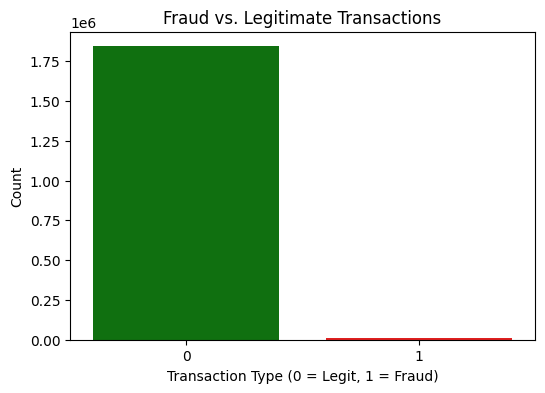

Fraudulent transactions make up 0.5210% of the dataset.


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['is_fraud'], palette=['green', 'red'])
plt.title("Fraud vs. Legitimate Transactions")
plt.xlabel("Transaction Type (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

fraud_ratio = df['is_fraud'].mean() * 100
print(f"Fraudulent transactions make up {fraud_ratio:.4f}% of the dataset.")


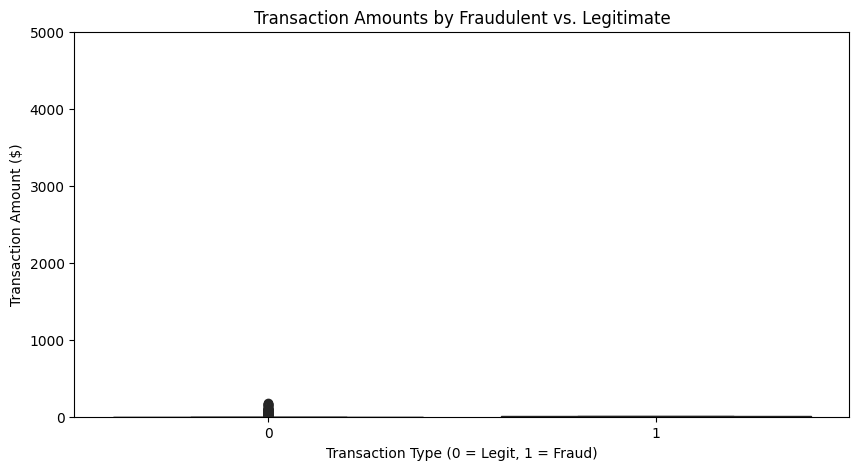

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['is_fraud'], y=df['amt'], palette=['green', 'red'])
plt.ylim(0, 5000)
plt.title("Transaction Amounts by Fraudulent vs. Legitimate")
plt.xlabel("Transaction Type (0 = Legit, 1 = Fraud)")
plt.ylabel("Transaction Amount ($)")
plt.show()


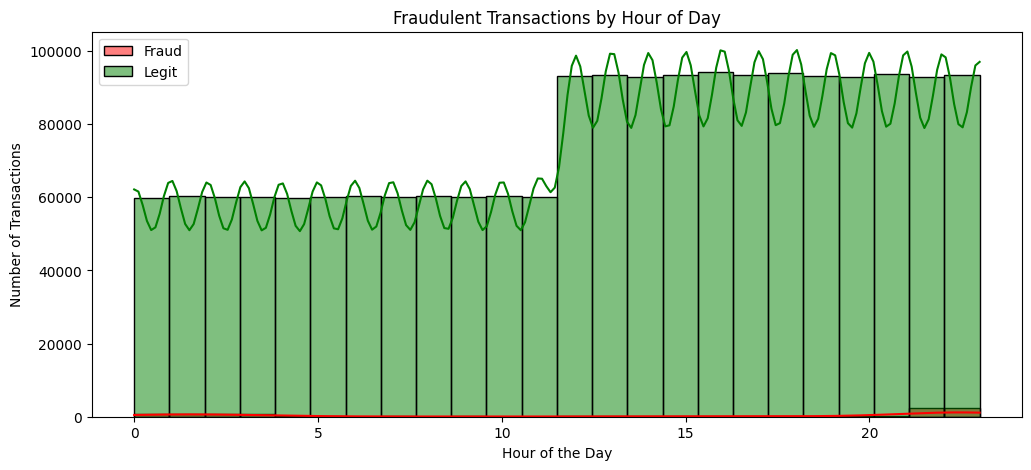

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df['is_fraud'] == 1]['transaction_hour'], bins=24, kde=True, color="red", label="Fraud")
sns.histplot(df[df['is_fraud'] == 0]['transaction_hour'], bins=24, kde=True, color="green", label="Legit")
plt.legend()
plt.title("Fraudulent Transactions by Hour of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.show()


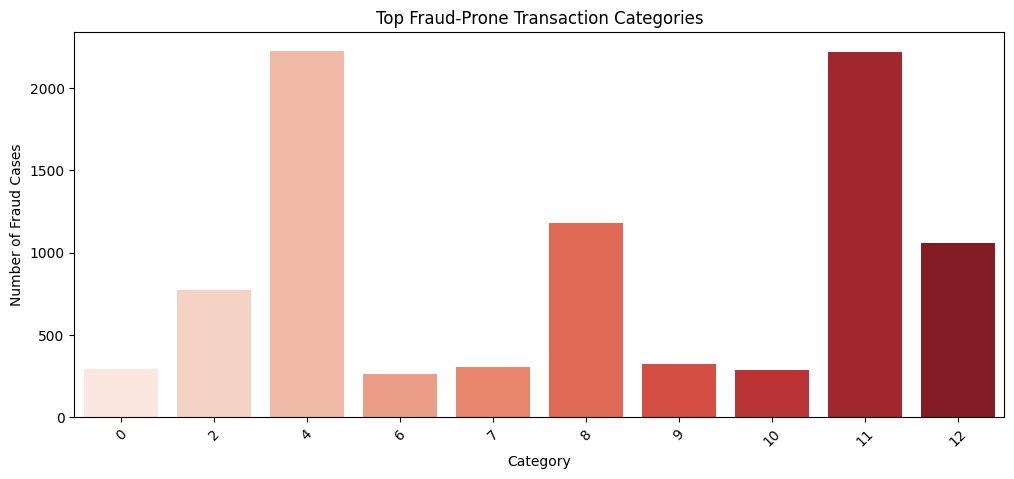

In [ ]:
plt.figure(figsize=(12, 5))
fraud_by_category = df[df['is_fraud'] == 1]['category'].value_counts().head(10)
sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values, palette='Reds')
plt.xticks(rotation=45)
plt.title("Top Fraud-Prone Transaction Categories")
plt.xlabel("Category")
plt.ylabel("Number of Fraud Cases")
plt.show()


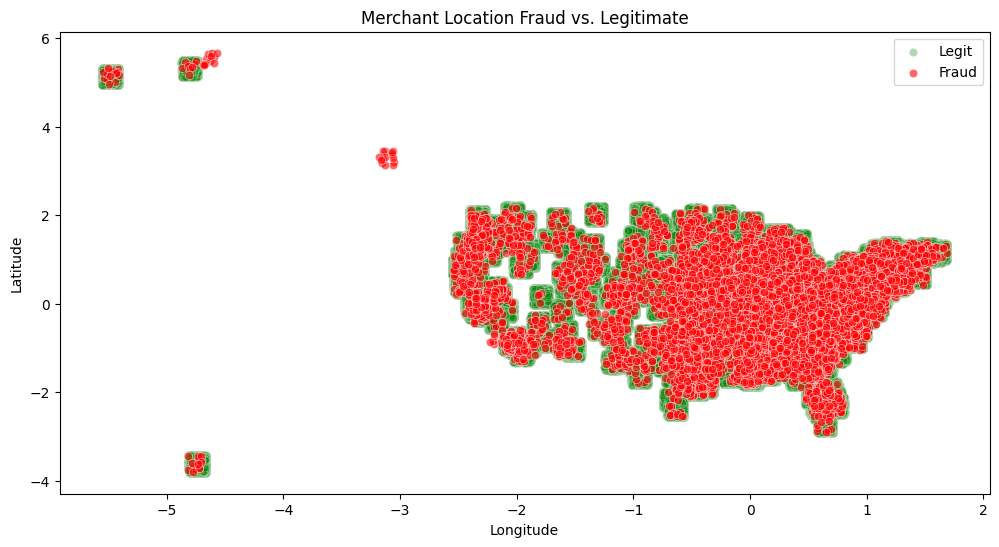

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df[df['is_fraud'] == 0]['merch_long'], y=df[df['is_fraud'] == 0]['merch_lat'], color='green', alpha=0.3, label="Legit")
sns.scatterplot(x=df[df['is_fraud'] == 1]['merch_long'], y=df[df['is_fraud'] == 1]['merch_lat'], color='red', alpha=0.6, label="Fraud")
plt.title("Merchant Location Fraud vs. Legitimate")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


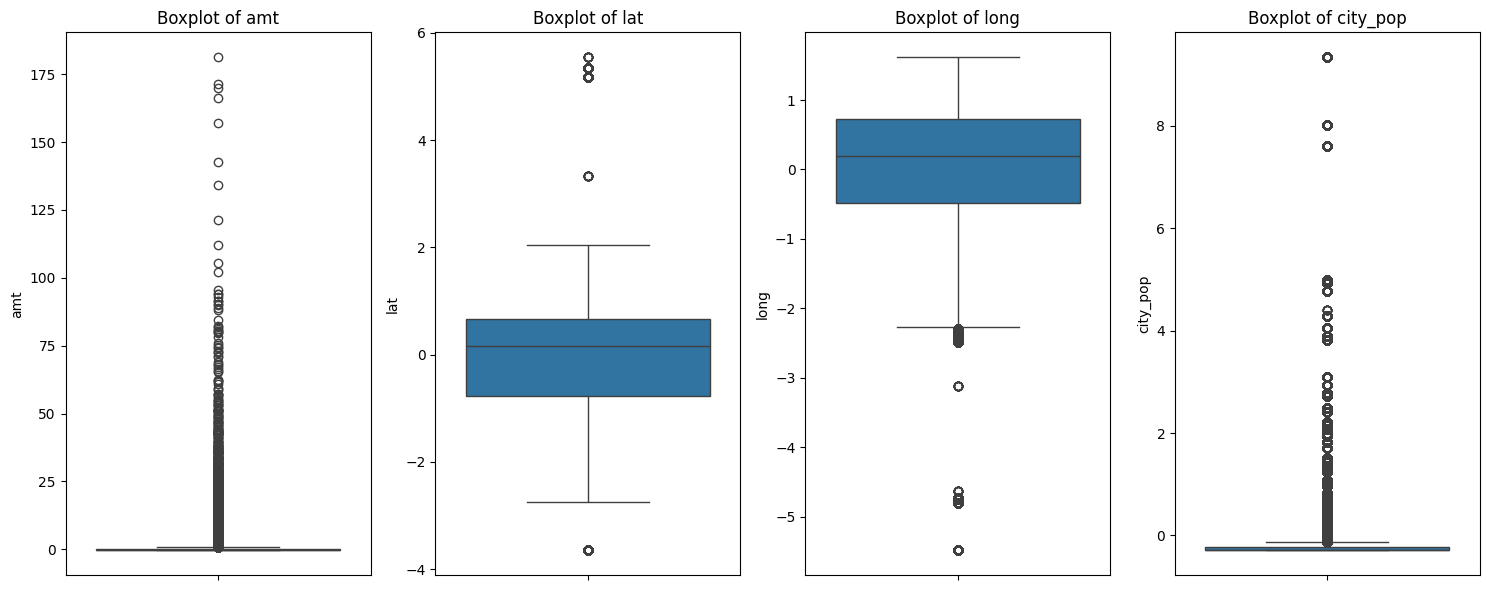

In [ ]:
num_cols = ['amt', 'lat', 'long', 'city_pop']

plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
df['transaction_count'] = df.groupby('cc_num')['cc_num'].transform('count')


In [ ]:
df['avg_transaction_amt'] = df.groupby('cc_num')['amt'].transform('mean')
# How much this transaction deviates from their usual spending
df['amt_deviation'] = df['amt'] / df['avg_transaction_amt']


In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)  # 1 if Sat/Sun, else 0
df['is_night'] = ((df['hour'] >= 22) | (df['hour'] <= 5)).astype(int)  # Night transactions


In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)  # 1 if Sat/Sun, else 0
df['is_night'] = ((df['hour'] >= 22) | (df['hour'] <= 5)).astype(int)  # Night transactions


In [ ]:
from geopy.distance import geodesic

def calculate_distance(row):
    user_loc = (row['lat'], row['long'])
    merchant_loc = (row['merch_lat'], row['merch_long'])
    return geodesic(user_loc, merchant_loc).km

df['distance_from_home'] = df.apply(calculate_distance, axis=1)


In [ ]:
df['category_encoded'] = df['category'].astype('category').cat.codes
df['merchant_encoded'] = df['merchant'].astype('category').cat.codes


In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,transaction_count,avg_transaction_amt,amt_deviation,hour,day_of_week,is_weekend,is_night,distance_from_home,category_encoded,merchant_encoded
0,2019-01-01 00:00:18,2703186189652095,514,8,-0.408741,Jennifer,Banks,0,561 Perry Cove,Moravian Falls,...,2927,0.121474,-3.364848,0,1,0,1,7.186058,8,514
1,2019-01-01 00:00:44,630423337322,241,4,0.233378,Stephanie,Gill,0,43039 Riley Greens Suite 393,Orient,...,4362,-0.087819,-2.657506,0,1,0,1,4.390676,4,241
2,2019-01-01 00:00:51,38859492057661,390,0,0.942184,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,...,735,-0.000875,-1077.181792,0,1,0,1,20.507692,0,390
3,2019-01-01 00:01:16,3534093764340240,360,2,-0.157381,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,...,743,0.062959,-2.499739,0,1,0,1,16.657264,2,360
4,2019-01-01 00:03:06,375534208663984,297,9,-0.176470,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,...,2922,0.158725,-1.111798,0,1,0,1,8.646045,9,297


In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'transaction_hour', 'transaction_day',
       'transaction_month', 'transaction_weekday', 'age', 'transaction_count',
       'avg_transaction_amt', 'amt_deviation', 'hour', 'day_of_week',
       'is_weekend', 'is_night', 'distance_from_home', 'category_encoded',
       'merchant_encoded'],
      dtype='object')

In [ ]:
#merchant-692,category-13,gender-2,State-50,Job-496

In [ ]:
from sklearn.model_selection import train_test_split

# Selecting relevant features
features = ['transaction_count', 'amt_deviation', 'hour', 'day_of_week', 'is_weekend',
            'is_night', 'distance_from_home', 'category_encoded', 'merchant_encoded']
X = df[features]
y = df['is_fraud']

# Splitting into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set Size: {X_train.shape}, Testing Set Size: {X_test.shape}")


Training Set Size: (1481915, 9), Testing Set Size: (370479, 9)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    print(f"🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"📊 {name} Performance:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


🔹 Training Logistic Regression...
📊 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368549
           1       0.00      0.00      0.00      1930

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

--------------------------------------------------
🔹 Training Random Forest...
📊 Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.91      0.41      0.56      1930

    accuracy                           1.00    370479
   macro avg       0.95      0.70      0.78    370479
weighted avg       1.00      1.00      1.00    370479

--------------------------------------------------
🔹 Training XGBoost...
📊 XGBoost Performance:
              precision    recall  f1-score   support

           0      